 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
whale_returns_path = Path('./Resources/whale_returns.csv')

In [3]:
# Reading whale returns
whale_returns = pd.read_csv(whale_returns_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_returns = whale_returns.dropna()
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [6]:
# Reading algorithmic returns
algo_returns_path = Path('./Resources/algo_returns.csv')
algo_returns = pd.read_csv(algo_returns_path, index_col='Date',parse_dates=True, infer_datetime_format=True)
algo_returns

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [7]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algo_returns = algo_returns.dropna()
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_history_path = Path('./Resources/sp_tsx_history.csv')
sp_tsx_history = pd.read_csv(sp_tsx_history_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
sp_tsx_history.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [10]:
# Check Data Types
sp_tsx_history.dtypes

Close    object
dtype: object

In [11]:
# Fix Data Types
sp_tsx_history['Close'] = sp_tsx_history['Close'].str.replace(',', '')
sp_tsx_history['Close'] = sp_tsx_history['Close'].str.replace('$', '')
sp_tsx_history['Close'] = sp_tsx_history['Close'].astype(float)

C:\Users\duke_\AppData\Local\Temp\ipykernel_12224\3488648842.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp_tsx_history['Close'] = sp_tsx_history['Close'].str.replace('$', '')


In [12]:
sp_tsx_history.dtypes

Close    float64
dtype: object

In [13]:
# Calculate Daily Returns
sp_tsx_daily_return = sp_tsx_history.pct_change()
sp_tsx_daily_return.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [14]:
# Drop nulls
sp_tsx_daily_return = sp_tsx_daily_return.dropna()
sp_tsx_daily_return.isnull().sum()

Close    0
dtype: int64

In [15]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_daily_return = sp_tsx_daily_return.rename(columns={"Close": "SP TSX"})
sp_tsx_daily_return

,SP TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [16]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
daily_returns = pd.concat([whale_returns, algo_returns, sp_tsx_daily_return], join='inner', axis=1)
daily_returns.isnull().mean() * 100

SOROS FUND MANAGEMENT LLC      0.0
PAULSON & CO.INC.              0.0
TIGER GLOBAL MANAGEMENT LLC    0.0
BERKSHIRE HATHAWAY INC         0.0
Algo 1                         0.0
Algo 2                         0.0
SP TSX                         0.0
dtype: float64

---

In [17]:
daily_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: xlabel='Date'>

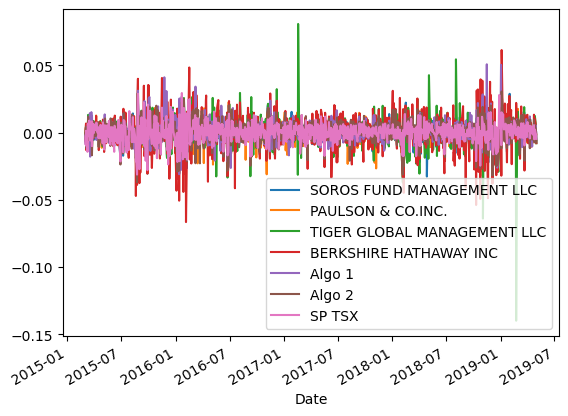

In [18]:
# Plot daily returns of all portfolios 
daily_returns.plot()


#### Calculate and Plot cumulative returns.

<Axes: xlabel='Date'>

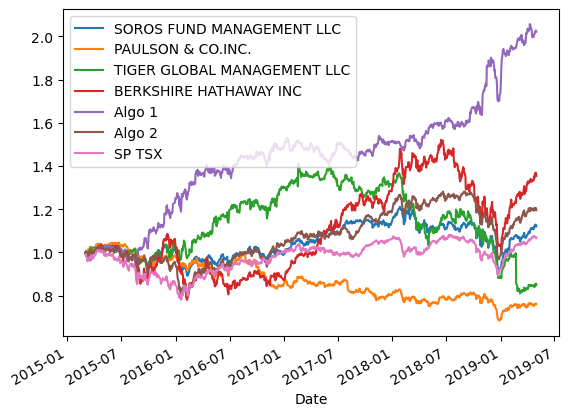

In [19]:
# Calculate cumulative returns of all portfolios
cum_returns = (1 + daily_returns).cumprod(axis=0)
cum_returns

# Plot cumulative returns
cum_returns.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<Axes: >

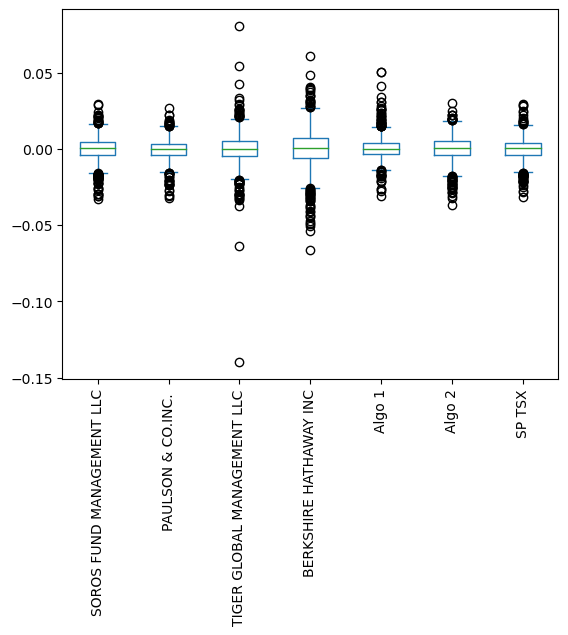

In [20]:
# Box plot to visually show risk 
daily_returns.plot(kind='box',rot=90)


### Calculate Standard Deviations

In [48]:
# Calculate the daily standard deviations of all portfolios
std_daily_returns = daily_returns.std()
std_daily_returns

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
SP TSX                         0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [22]:
# Calculate  the daily standard deviation of S&P TSX 60
volatility_sp = daily_returns['SP TSX'].std()
print(volatility_sp)

0.007034167748577725


In [23]:
# Determine which portfolios are riskier than the S&P TSX 60   

for index, value in std_daily_returns.iteritems():
    if value > volatility_sp:
        print(f"Index: {index}, Value: {value}")



Index: SOROS FUND MANAGEMENT LLC, Value: 0.007827576541233951
Index: TIGER GLOBAL MANAGEMENT LLC, Value: 0.010882785735819496
Index: BERKSHIRE HATHAWAY INC, Value: 0.012825516031663223
Index: Algo 1, Value: 0.007588882996571315
Index: Algo 2, Value: 0.008326359992689701


C:\Users\duke_\AppData\Local\Temp\ipykernel_12224\1393939158.py:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in std_daily_returns.iteritems():


### Calculate the Annualized Standard Deviation

In [24]:
# Calculate the annualized standard deviation (252 trading days)
volatility = daily_returns.std() * np.sqrt(252)
volatility

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
SP TSX                         0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: xlabel='Date'>

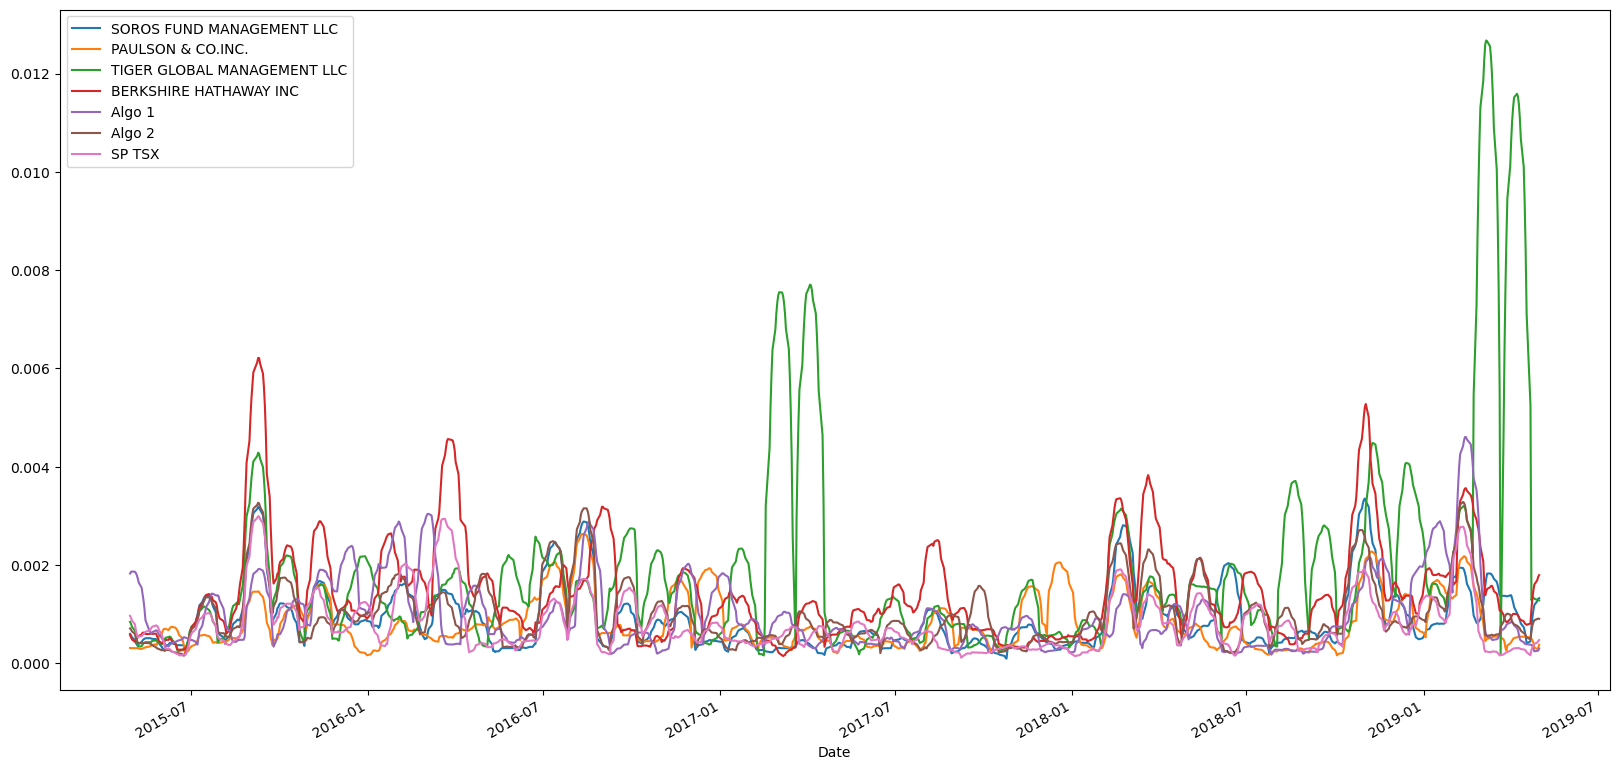

In [52]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = daily_returns.rolling(window=21).std()
# Plot the rolling standard deviation
rolling_std.rolling(window=21).std().plot(figsize=(20,10))

### Calculate and plot the correlation

In [26]:
# Calculate the correlation
correlation = daily_returns.corr()

# Display de correlation matrix
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP TSX
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
SP TSX,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<Axes: title={'center': 'Rolling 30-Day Beta of Algo 1'}, xlabel='Date'>

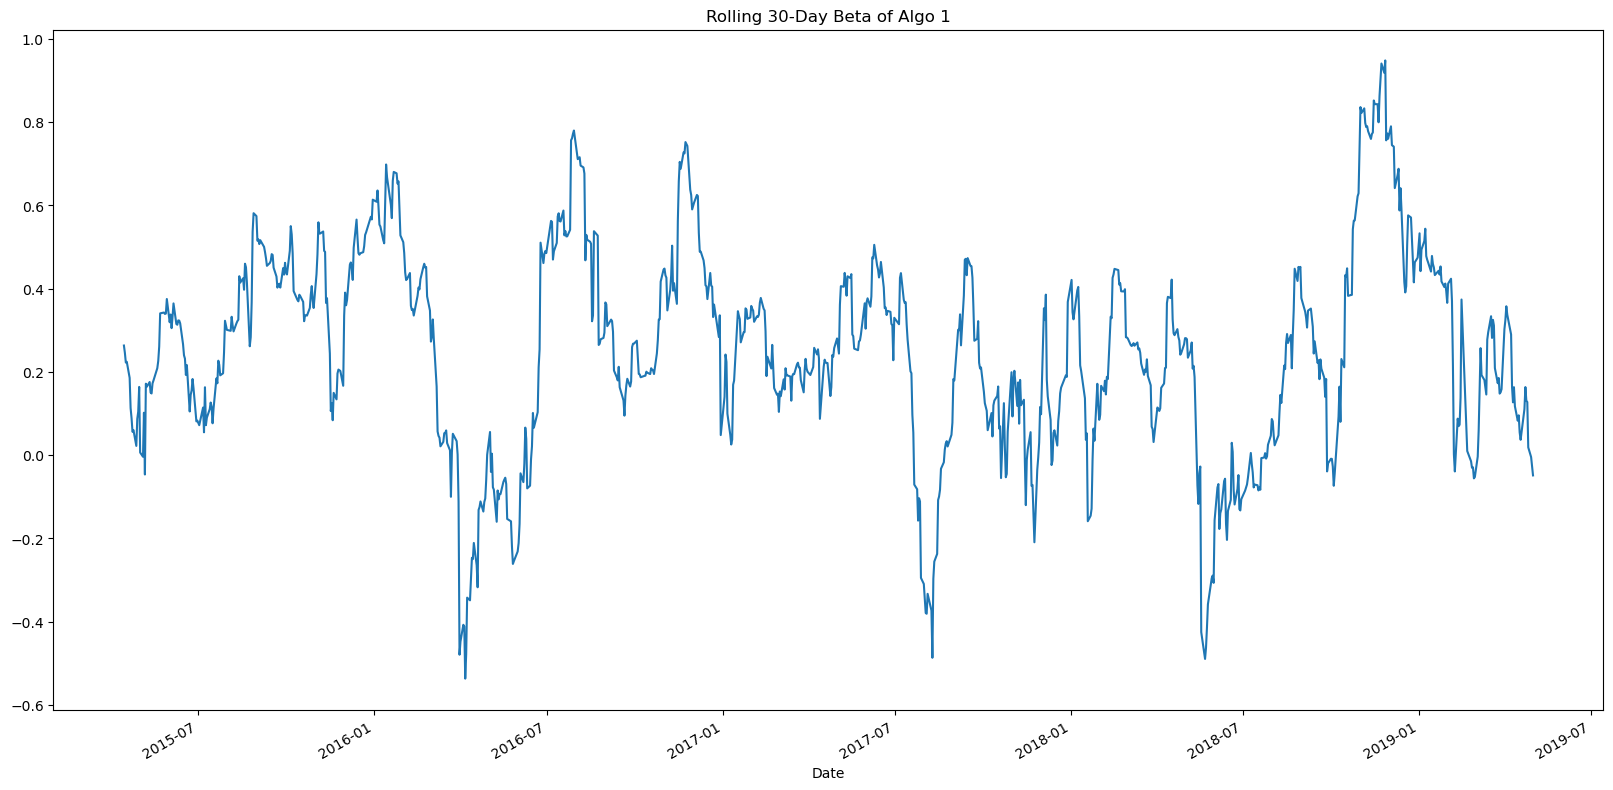

In [27]:
# Calculate covariance of a single portfolio
cov_algo1 = daily_returns['Algo 1'].cov(daily_returns['SP TSX'])
cov_algo1
# Calculate variance of S&P TSX
var_sp_tsx = daily_returns['SP TSX'].var()
var_sp_tsx
# Computing beta
algo1_beta = cov_algo1 / var_sp_tsx

# Plot beta trend
rolling_covariance = daily_returns['Algo 1'].rolling(window=30).cov(daily_returns['SP TSX'])
rolling_variance = daily_returns['SP TSX'].rolling(window=30).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 30-Day Beta of Algo 1')


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<Axes: xlabel='Date'>

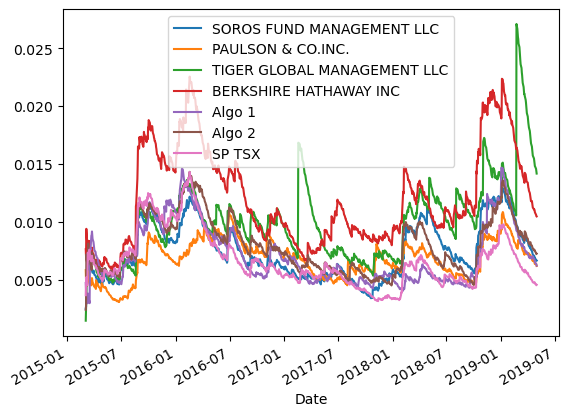

In [28]:
# Use `ewm` to calculate the rolling window
daily_returns.ewm(halflife=21).std().plot()

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [29]:
# Annualized Sharpe Ratios
sharpe_ratios = (daily_returns.mean() * 252) / (daily_returns.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
SP TSX                         0.195550
dtype: float64

<Axes: >

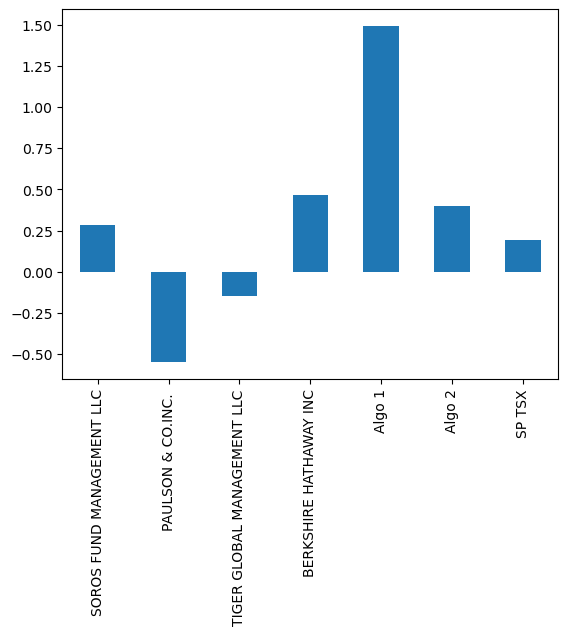

In [30]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar')

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Both Algo 1 and 2 out performed the SP TSX market. Berkshire and Soros all outperformed the market but Paulson and Tiger did not. 

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [31]:
# Reading data from 1st stock
bhp_path = Path('./Resources/BHP.csv')
bhp_data = pd.read_csv(bhp_path,index_col='Date', parse_dates=True, infer_datetime_format=True)
bhp_data

,Close
Date,
2016-01-04,17.80
2016-01-05,17.58
2016-01-06,17.15
2016-01-07,16.33
2016-01-08,16.35
...,...
2018-12-21,33.36
2018-12-24,33.50
2018-12-27,34.15


In [32]:
# Reading data from 2nd stock
ivv_path = Path('./Resources/IVV.csv')
ivv_data = pd.read_csv(ivv_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
ivv_data

,Close
Date,
2016-01-04,18.76
2016-01-05,18.77
2016-01-06,18.81
2016-01-07,18.71
2016-01-08,18.57
...,...
2018-12-21,23.46
2018-12-24,23.07
2018-12-27,23.55


In [33]:
# Reading data from 3rd stock
ndq_data = Path('./Resources/NDQ.csv')
ndq_data = pd.read_csv(ndq_data,index_col='Date', parse_dates=True, infer_datetime_format=True)
ndq_data

,Close
Date,
2016-01-04,10.97
2016-01-05,10.90
2016-01-06,10.88
2016-01-07,10.85
2016-01-08,10.66
...,...
2018-12-21,15.32
2018-12-24,14.89
2018-12-27,15.34


In [34]:
# Combine all stocks in a single DataFrame
combined_df = pd.concat([bhp_data, ivv_data, ndq_data],join='inner', axis=1) 
combined_df

,Close,Close,Close
Date,,,
2016-01-04,17.80,18.76,10.97
2016-01-05,17.58,18.77,10.90
2016-01-06,17.15,18.81,10.88
2016-01-07,16.33,18.71,10.85
2016-01-08,16.35,18.57,10.66
...,...,...,...
2018-12-21,33.36,23.46,15.32
2018-12-24,33.50,23.07,14.89
2018-12-27,34.15,23.55,15.34


In [35]:
# Reset Date index
"""
Date index already reset as I used index_col='Date', parse_dates=True, infer_datetime_format=True in pd.read_csv
"""

"\nDate index already reset as I used index_col='Date', parse_dates=True, infer_datetime_format=True in pd.read_csv\n"

In [36]:
# Reorganize portfolio data by having a column per symbol
combined_df.columns = ['BHP', 'IVV', 'NDQ']
combined_df


,BHP,IVV,NDQ
Date,,,
2016-01-04,17.80,18.76,10.97
2016-01-05,17.58,18.77,10.90
2016-01-06,17.15,18.81,10.88
2016-01-07,16.33,18.71,10.85
2016-01-08,16.35,18.57,10.66
...,...,...,...
2018-12-21,33.36,23.46,15.32
2018-12-24,33.50,23.07,14.89
2018-12-27,34.15,23.55,15.34


In [37]:
# Calculate daily returns
woods_daily_returns = combined_df.pct_change()

# Drop NAs
woods_daily_returns.dropna(inplace=True)
woods_daily_returns.isnull().sum()
# Display sample data
woods_daily_returns

,BHP,IVV,NDQ
Date,,,
2016-01-05,-0.012360,0.000533,-0.006381
2016-01-06,-0.024460,0.002131,-0.001835
2016-01-07,-0.047813,-0.005316,-0.002757
2016-01-08,0.001225,-0.007483,-0.017512
2016-01-11,-0.048930,-0.008616,-0.003752
...,...,...,...
2018-12-21,0.022685,-0.002975,-0.001954
2018-12-24,0.004197,-0.016624,-0.028068
2018-12-27,0.019403,0.020806,0.030222


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [38]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
woods_daily_returns = woods_daily_returns.dot(weights)
# Display sample data
woods_daily_returns

Date
2016-01-05   -0.006069
2016-01-06   -0.008054
2016-01-07   -0.018629
2016-01-08   -0.007923
2016-01-11   -0.020433
                ...   
2018-12-21    0.005919
2018-12-24   -0.013498
2018-12-27    0.023477
2018-12-28    0.006913
2018-12-31    0.002278
Length: 756, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [39]:
# Join your returns DataFrame to the original returns DataFrame
all_portfolios = pd.concat([woods_daily_returns, daily_returns ], axis="columns", join="inner")
all_portfolios.columns = ['WOODS', 'SOROS', 'PAULSON','TIGER','BERKSHIRE','ALGO 1','ALGO 2', 'SP TSX']
all_portfolios

,WOODS,SOROS,PAULSON,TIGER,BERKSHIRE,ALGO 1,ALGO 2,SP TSX
Date,,,,,,,,
2016-01-05,-0.006069,-0.000398,0.002242,0.006798,-0.002960,0.009160,0.001770,-0.000542
2016-01-06,-0.008054,-0.011558,-0.006955,-0.003349,0.017758,0.010346,-0.015503,-0.014964
2016-01-07,-0.018629,-0.020495,-0.007167,-0.021324,-0.033944,-0.000081,-0.029061,-0.021890
2016-01-08,-0.007923,-0.008149,-0.008307,-0.010071,-0.017585,-0.006897,-0.012941,-0.000222
2016-01-11,-0.020433,-0.005272,-0.001480,0.011699,-0.003927,-0.007627,-0.018451,-0.010140
...,...,...,...,...,...,...,...,...
2018-12-21,0.005919,-0.022720,-0.020980,-0.022570,-0.028892,-0.017888,-0.021636,-0.014590
2018-12-24,-0.013498,-0.019152,-0.011786,-0.029165,-0.020181,-0.003938,-0.014745,-0.011141
2018-12-27,0.023477,0.004184,-0.007472,0.009149,0.004813,0.001571,0.000494,0.027940


In [40]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_portfolios.isnull().sum()

WOODS        0
SOROS        0
PAULSON      0
TIGER        0
BERKSHIRE    0
ALGO 1       0
ALGO 2       0
SP TSX       0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [41]:
# Calculate the annualized `std`
woods_volatility = woods_daily_returns.std() * np.sqrt(252)
woods_volatility

0.15483932396311822

### Calculate and plot rolling `std` with 21-day window

<Axes: title={'center': 'Woods 21 Day Rolling STD'}, xlabel='Date'>

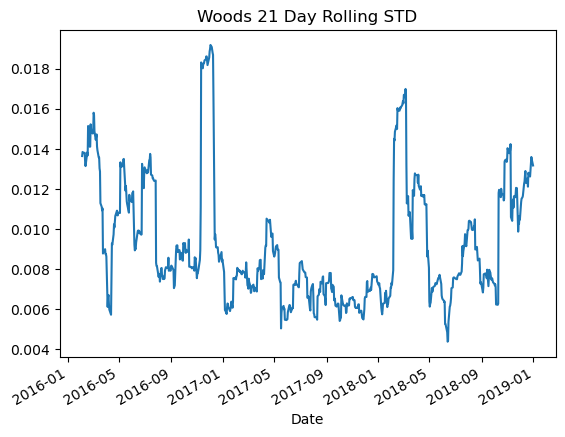

In [42]:
# Calculate rolling standard deviation
woods_rolling_std = all_portfolios['WOODS'].rolling(window=21).std()
# Plot rolling standard deviation
woods_rolling_std.plot(title = 'Woods 21 Day Rolling STD')

### Calculate and plot the correlation

<Axes: >

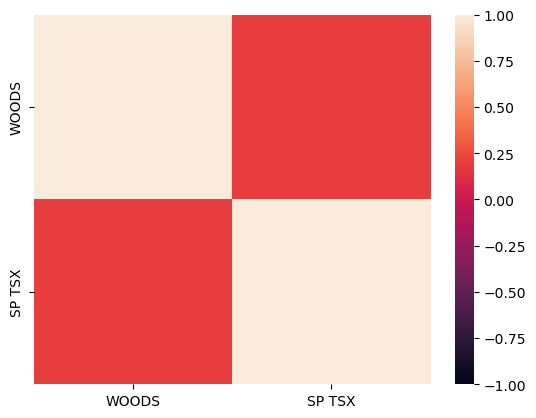

In [43]:
# Calculate and plot the correlation

woods_spx = all_portfolios[['WOODS', 'SP TSX']]

woods_correlation = woods_spx.corr()

sns.heatmap(woods_correlation, vmin=-1, vmax=1)


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<Axes: title={'center': 'Rolling 60-Day Beta of WOODS Portfolio'}, xlabel='Date'>

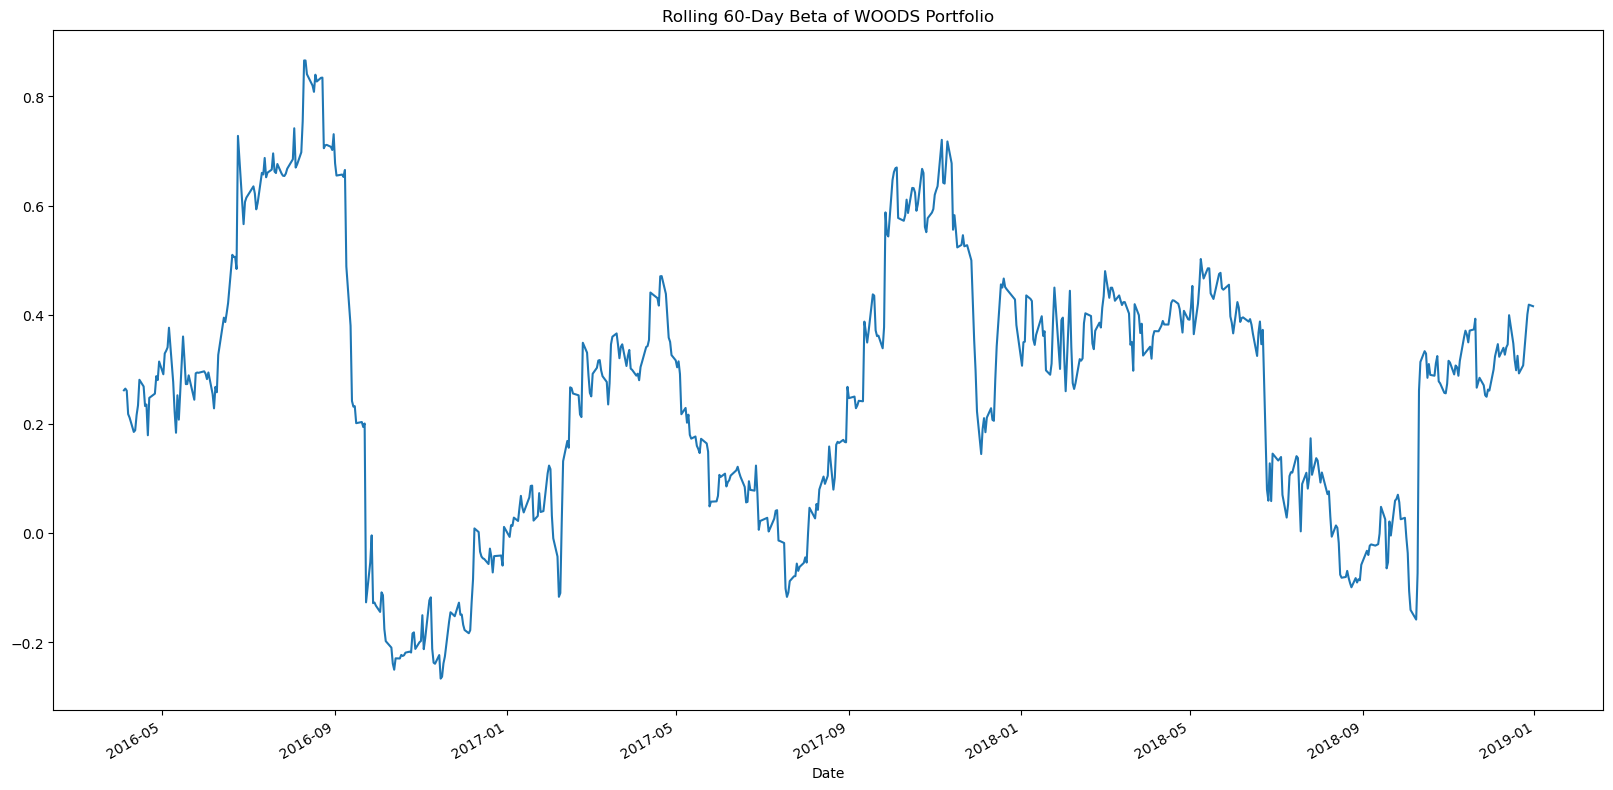

In [44]:
# Calculate and plot Beta
rolling_covariance2 = all_portfolios['WOODS'].rolling(window=60).cov(all_portfolios['SP TSX'])
rolling_variance2 = all_portfolios['SP TSX'].rolling(window=60).var()
rolling_beta2 = rolling_covariance2 / rolling_variance2
rolling_beta2.plot(figsize=(20, 10), title='Rolling 60-Day Beta of WOODS Portfolio')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [45]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios2 = (all_portfolios.mean() * 252) / (all_portfolios.std() * np.sqrt(252))


<Axes: >

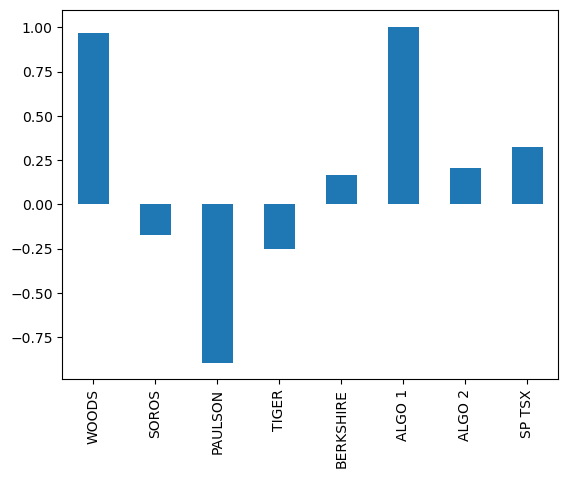

In [46]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios2.plot(kind='bar',rot=90)

### How does your portfolio do?

Write your answer here!

In [47]:
"""
Woods and Algo 1 have the best Sharpe ratio's. The higher the Sharpe ratio is the more favorable risk-return trade-off.
Which means the investment is generating better returns relative to its risk.
"""

"\nWoods and Algo 1 have the best Sharpe ratio's of close to 1. The higher the Sharpe ratio is the more favorable risk-return trade-off.\nWhich means the investment is generating better returns relative to its risk.\n"